#### 生成和显示二分类数据

y: [0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0]
Class 0: (array([ 0,  1,  3,  5,  6, 10, 15, 16, 20, 21, 23, 24, 25, 26, 29],
      dtype=int64),)
Class 1: (array([ 2,  4,  7,  8,  9, 11, 12, 13, 14, 17, 18, 19, 22, 27, 28],
      dtype=int64),)


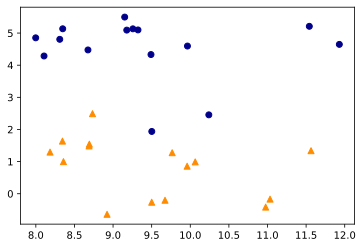

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=2, random_state=4,\
                 n_samples=30)

print("y:", y)

id0 = np.where(y==0)
id1 = np.where(y==1)
print("Class 0:", id0)
print("Class 1:", id1)

plt.plot(X[id0,0],X[id0,1],'^',\
            color='darkorange')
plt.plot(X[id1,0],X[id1,1],'o',\
            color="darkblue")

plt.show()

#### 最小二乘法学习

**分类预测**
    $$ y = \begin{cases} 0, &\mathbf{w}^t\mathbf{x}+b\le 0.5 \\ 1, &\mathbf{w}^t\mathbf{x}+b>0.5 \end{cases} $$

In [7]:
from sklearn.linear_model import LinearRegression

m = X.shape[0]
LR = LinearRegression()
LR.fit(X,y)
output_y = LR.predict(X)

print("output_y:\n", output_y)

id1 = np.where(output_y>0.5)
predict_y = np.zeros((m,),dtype=int)
predict_y[id1] = 1

print("\n y vs. predict_y:")
print(y)
print(predict_y)

output_y:
 [ 0.21040467  0.09021125  0.94609321 -0.05280296  1.14719108  0.12649037
  0.22355466  0.7999672   0.92231782  1.0403301  -0.11770245  0.99577164
  0.86528692  1.02166172  0.48861107  0.21111013 -0.24509014  0.86824335
  1.03377683  0.91931996  0.14786233  0.43306182  1.02901332  0.16028557
 -0.13843219  0.22970283 -0.10955641  0.34417848  1.10937381  0.29976401]

 y vs. predict_y:
[0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0]
[0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0]


#### 显示分类边界

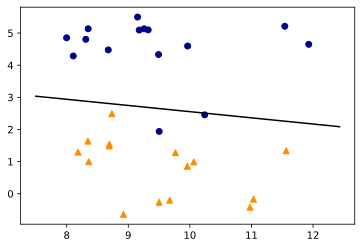

In [8]:
eps = 0.5
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps

xx = np.linspace(x_min, x_max, 1000)
yy = -1*(LR.coef_[0]*xx + LR.intercept_ - 0.5) / LR.coef_[1]

id0 = np.where(y==0)
id1 = np.where(y==1)

plt.plot(X[id0,0],X[id0,1],'^',\
            color='darkorange')
plt.plot(X[id1,0],X[id1,1],'o',\
            color="darkblue")
plt.plot(xx,yy,'black')

plt.show()

#### Logistic Regression分类

y vs. predict_y:
[0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0]
[0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0]

w and b:
 [[0.34745716 1.67046518]] [-7.48104489]


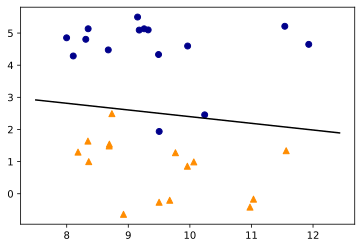

In [9]:
from sklearn.linear_model import LogisticRegression

CLF = LogisticRegression().fit(X, y)
predict_y = CLF.predict(X)
print("y vs. predict_y:")
print(y), print( predict_y)
print("\nw and b:\n", CLF.coef_,CLF.intercept_)

xx = np.linspace(x_min, x_max, 1000)
yy = -1*(CLF.coef_[0][0]*xx + CLF.intercept_) / CLF.coef_[0][1]

id0 = np.where(y==0)
id1 = np.where(y==1)

plt.plot(X[id0,0],X[id0,1],'^',\
            color='darkorange')
plt.plot(X[id1,0],X[id1,1],'o',\
            color="darkblue")
plt.plot(xx,yy,'black')

plt.show()